#### IMPORT LIB

In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

#### READ DATASET

In [8]:
df = pd.read_csv('Advertising_Sales.csv')
df.head()

,Unnamed: 0,TV Ad Budget ($),Radio Ad Budget ($),Newspaper Ad Budget ($),Sales ($)
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9


**Drop unwanted feature 'Unnamed' and rename other Feature

In [9]:
df.drop('Unnamed: 0',axis=1,inplace=True)
df.columns = ['TV','Radio','Newspaper','Sales']
df.head()

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9


In [10]:
df.shape

(200, 4)

#### Handling Null Values

In [11]:
df.isnull().sum()

TV           0
Radio        0
Newspaper    0
Sales        0
dtype: int64

#### Handling Duplicated Values

In [12]:
df.duplicated().sum()

0

#### EDA 

In [13]:
df.describe()

,TV,Radio,Newspaper,Sales
count,200.000000,200.000000,200.000000,200.000000
mean,147.042500,23.264000,30.554000,14.022500
std,85.854236,14.846809,21.778621,5.217457
min,0.700000,0.000000,0.300000,1.600000
25%,74.375000,9.975000,12.750000,10.375000
50%,149.750000,22.900000,25.750000,12.900000
75%,218.825000,36.525000,45.100000,17.400000
max,296.400000,49.600000,114.000000,27.000000


#### CORRELATION

In [16]:
corr = df.corr()
corr

,TV,Radio,Newspaper,Sales
TV,1.000000,0.054809,0.056648,0.782224
Radio,0.054809,1.000000,0.354104,0.576223
Newspaper,0.056648,0.354104,1.000000,0.228299
Sales,0.782224,0.576223,0.228299,1.000000


In [19]:
import plotly.express as px

In [22]:
fig = px.imshow(corr, text_auto=True)
fig.show()

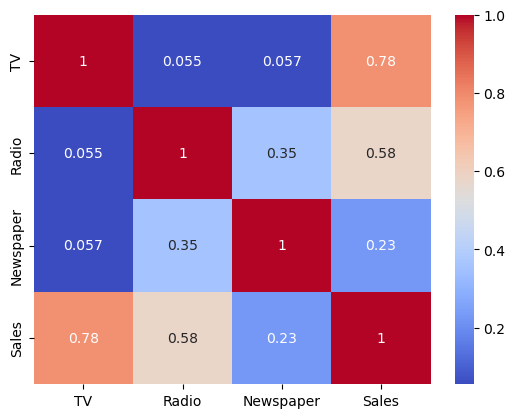

In [18]:
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.show()

#### INFERENCE
1)High correlarion between TV and Sales

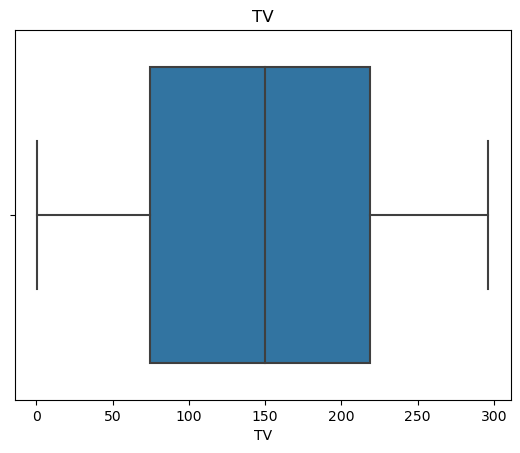

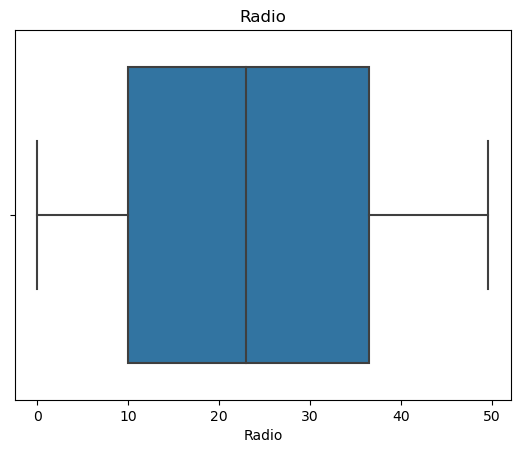

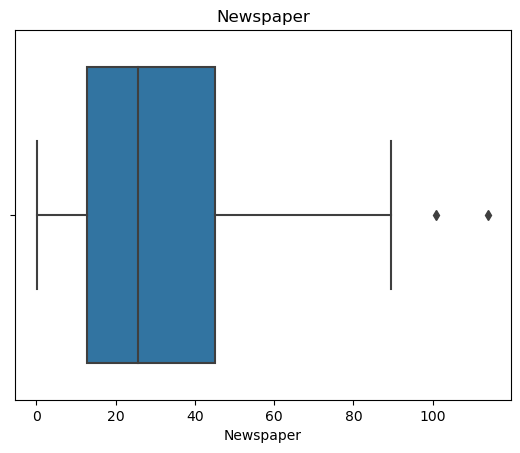

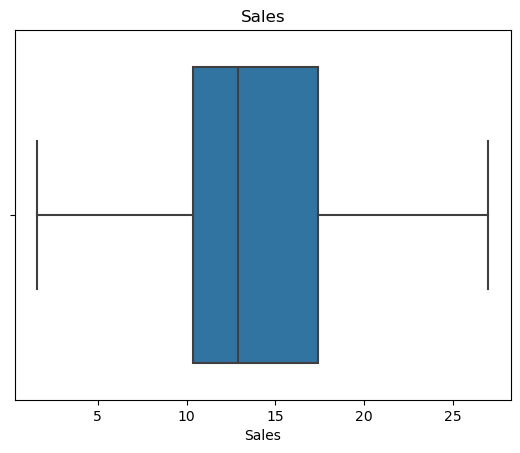

In [23]:
for i in df.columns:
    plt.title(f'{i}')
    sns.boxplot(x=df[i])
    plt.show()

In [1]:
#pip install dash

#### INFERENCE
1) OUTLIERS are almost nil , hence outliers treatment not needed.

In [14]:
df.describe(percentiles=[0.01,0.02,0.05,0.95,0.98,0.99]).T

,count,mean,std,min,1%,2%,5%,50%,95%,98%,99%,max
TV,200.0,147.0425,85.854236,0.7,5.387,7.790,13.195,149.75,280.735,289.720,292.907,296.4
Radio,200.0,23.2640,14.846809,0.0,0.399,1.290,1.995,22.90,46.810,49.000,49.400,49.6
Newspaper,200.0,30.5540,21.778621,0.3,0.999,1.798,3.600,25.75,71.825,79.312,89.515,114.0
Sales,200.0,14.0225,5.217457,1.6,4.784,5.300,6.600,12.90,23.800,25.400,25.507,27.0


In [15]:
print(df[df['Newspaper']>89.515].shape)

(2, 4)


#### Select x and y

In [17]:
#x = df.drop('Sales',axis=1)
#y = df['Sales']
x= df.iloc[:,:-1]
y = df.iloc[:,-1]
print(type(x))
print(type(y))
print(x.shape)
print(y.shape)

<class 'pandas.core.frame.DataFrame'>
<class 'pandas.core.series.Series'>
(200, 3)
(200,)


#### Split Train and Test

In [18]:
from sklearn.model_selection import train_test_split

In [19]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.3,random_state=29)
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(140, 3)
(60, 3)
(140,)
(60,)


#### Model Fitting

In [22]:
from sklearn.linear_model import LinearRegression

In [23]:
lr_base = LinearRegression()
lr_base.fit(x_train,y_train)

LinearRegression()

In [24]:
print('train scr',lr_base.score(x_train,y_train))
print('test scr',lr_base.score(x_test,y_test))

train scr 0.8888173253368554
test scr 0.905258175895029


In [25]:
print(lr_base.coef_)
print(lr_base.intercept_)

[0.04422917 0.18781641 0.0075874 ]
2.9740973573011544


**Model is Underfit as test score is higher than train score

#### Cross Validation Score

In [26]:
from sklearn.model_selection import cross_val_score

In [29]:
model = LinearRegression()
scores = cross_val_score(model,x,y,cv=15)
print(scores)
print(scores.mean())

[0.77365797 0.89931899 0.88894743 0.93175573 0.93367939 0.71429954
 0.92664171 0.94439136 0.9423114  0.71152538 0.92076147 0.88511231
 0.79281889 0.90037449 0.91805614]
0.8722434812544484


#### Assumptions Check

#### 1) Check Linearity of independent features with target variable

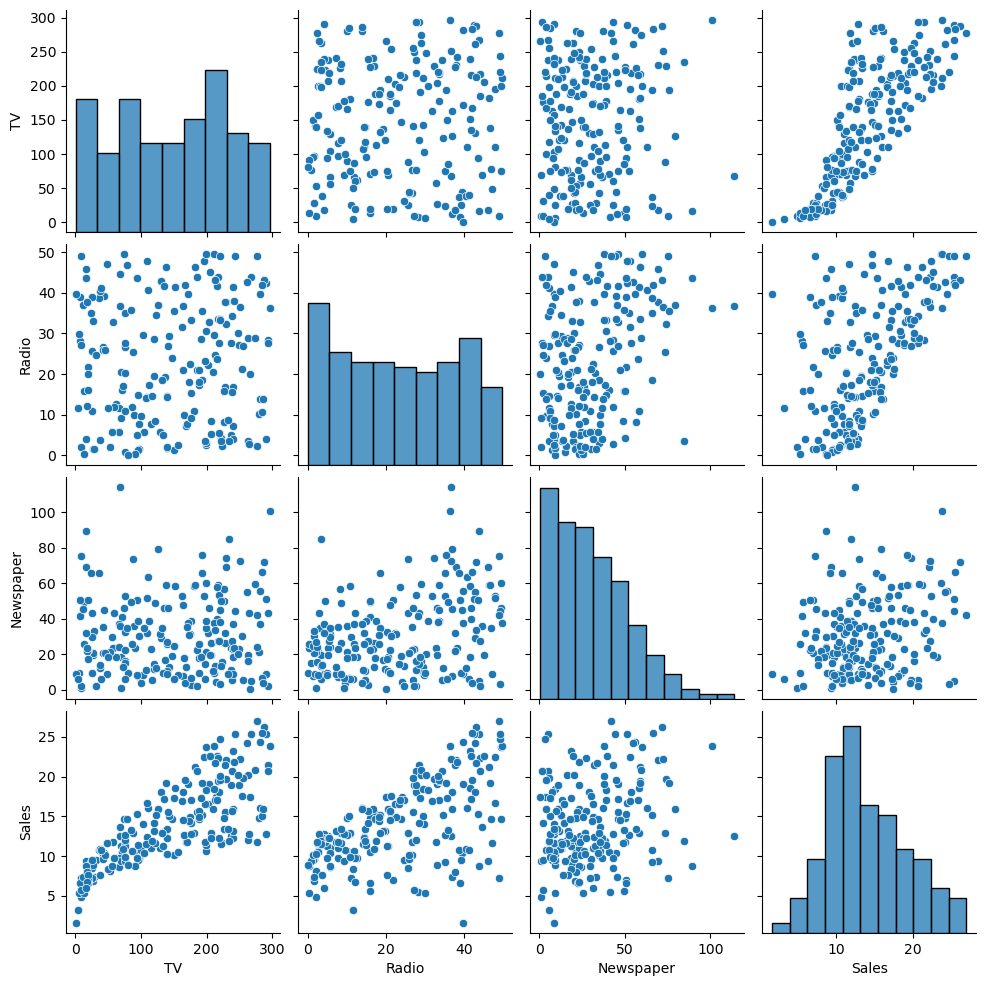

In [30]:
sns.pairplot(df)
plt.show()

#### 2) Check Multicollinearity

In [31]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [32]:
vif = pd.DataFrame()
vif['Features'] = x.columns
vif['VIF'] = [variance_inflation_factor(x.values,i) for i in range(x.shape[1])]
vif = vif.sort_values(by='VIF',ascending=False)                
vif

,Features,VIF
1,Radio,3.285462
2,Newspaper,3.055245
0,TV,2.486772


#### Inference
Columns dont exhibit Multicollinearity

#### 3) Check the presence of Autocorrelation (Using Durbin Watson test)

In [33]:
# H0 (null hypothesis): There is no correlation among the residuals.
# H1 (alternative hypothesis): The residuals are autocorrelated.

In [34]:
import statsmodels.api as sm
# import statsmodels.api as sm  # OLS

In [35]:
x1 = x.copy()
y1 = y.copy()

In [36]:
x1 = sm.add_constant(x1)
ols_m1 = sm.OLS(y1,x1).fit()
ols_m1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Sales   R-squared:                       0.897
Model:                            OLS   Adj. R-squared:                  0.896
Method:                 Least Squares   F-statistic:                     570.3
Date:                Sun, 08 Oct 2023   Prob (F-statistic):           1.58e-96
Time:                        11:01:50   Log-Likelihood:                -386.18
No. Observations:                 200   AIC:                             780.4
Df Residuals:                     196   BIC:                             793.6
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          2.9389      0.312      9.422      0.000       2.324       3.554
TV             0.0458      0.001     32.809      0.000       0.043       0.049
Radio          0.1885      0.009     21.893      0.000       0.172       0.206
Newspaper     -0.0010      0.006     -0.177      0.860      -0.013       0.011
==============================================================================
Omnibus:                       60.414   Durbin-Watson:                   2.084
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              151.241
Skew:                          -1.327   Prob(JB):                     1.44e-33
Kurtosis:                       6.332   Cond. No.                         454.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [37]:
print(ols_m1.rsquared)
print(ols_m1.rsquared_adj)

0.8972106381789521
0.8956373316204667


#### Inference
Newspaper has a very p-value>0.05.

In [38]:
from statsmodels.stats.stattools import durbin_watson


res = durbin_watson(ols_m1.resid)
print(res)
# tetst_stats values between 1.5 and 2.5 are not problematic.

2.083648405294407


#### 3) Normality of Residuals

In [44]:
from scipy.stats import shapiro

In [45]:
residuals = ols_m1.resid

In [46]:
print(shapiro(residuals))

ShapiroResult(statistic=0.917664647102356, pvalue=3.938186221574824e-09)


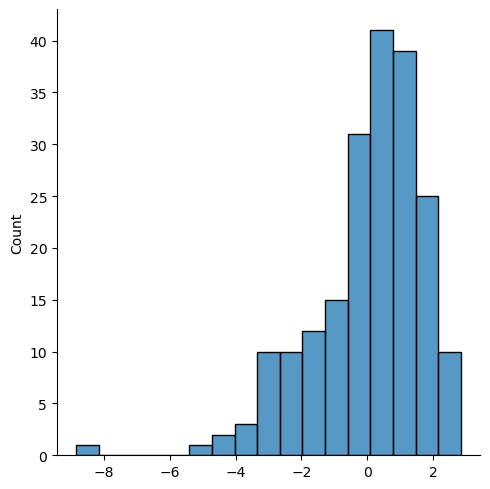

In [47]:
sns.displot(residuals)
plt.show()

#### Inference
Residuals are not normally distributed.

#### 4) Homoscedastic

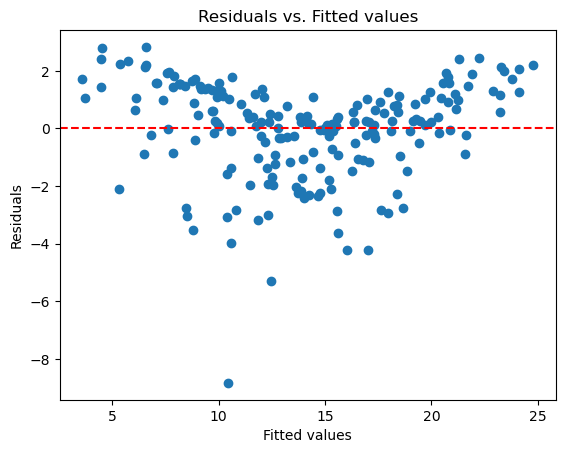

In [48]:
plt.scatter(ols_m1.predict(), residuals)   # varaince between residuals and predicted values
plt.axhline(0, color='red', linestyle='--')
plt.xlabel('Fitted values')
plt.ylabel('Residuals')
plt.title('Residuals vs. Fitted values')
plt.show()

#### Inference
The varaince between residuals and predicted values is not constant, thus exhibiting Hetroscedasticity

#### Variance Influence Points (For making p_val<= 0.05)

In [49]:
# ypred = m1x1 + m2x2 + m3x3 + c = m1*Tv + m2*Radio + m3*Newspaper + c

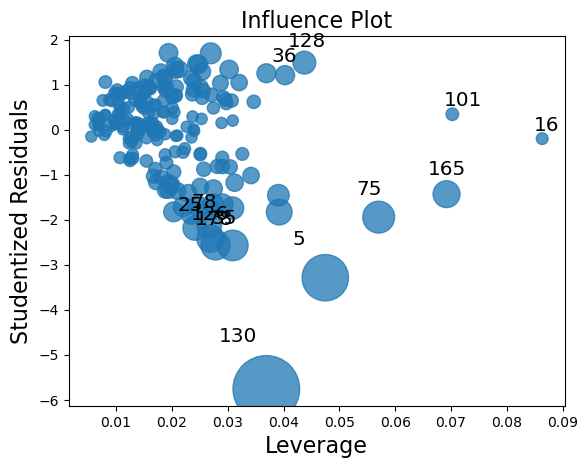

In [50]:
import statsmodels.api as sm
sm.graphics.influence_plot(ols_m1)
plt.show()

In [51]:
#### Index 130 is showing high influence => Exclude row 130

In [52]:
df1 = df.copy()

In [53]:
print(df1.shape)
df1.head()

(200, 4)


,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9


In [54]:
df1.drop(df1.index[130],axis=0,inplace=True)
df1.shape

(199, 4)

In [55]:
# df1.iloc[125:135,]

#### OLS Model - 2

In [56]:
x2 = df1.drop('Sales',axis=1)
y2 = df1['Sales']
print(x2.shape)
print(y2.shape)

(199, 3)
(199,)


In [57]:
x2 = sm.add_constant(x2)
ols_m2 = sm.OLS(y2,x2).fit()
ols_m2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Sales   R-squared:                       0.910
Model:                            OLS   Adj. R-squared:                  0.908
Method:                 Least Squares   F-statistic:                     653.7
Date:                Sun, 08 Oct 2023   Prob (F-statistic):          1.88e-101
Time:                        11:04:37   Log-Likelihood:                -369.13
No. Observations:                 199   AIC:                             746.3
Df Residuals:                     195   BIC:                             759.4
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          3.0931      0.290     10.654      0.000       2.520       3.666
TV             0.0448      0.001     34.425      0.000       0.042       0.047
Radio          0.1939      0.008     24.130      0.000       0.178       0.210
Newspaper     -0.0043      0.005     -0.777      0.438      -0.015       0.007
==============================================================================
Omnibus:                       21.217   Durbin-Watson:                   2.157
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               24.630
Skew:                          -0.835   Prob(JB):                     4.48e-06
Kurtosis:                       3.423   Cond. No.                         456.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

#### Inference
1) The p_value of Newspaper has been reduced. Still the p-value is high

#### Final Model

In [58]:
x3 = df1.drop(['Sales','Newspaper'],axis=1)  
y3 = df1['Sales']
print(x3.shape)
print(y3.shape)

(199, 2)
(199,)


In [59]:
x3 = sm.add_constant(x3)
ols_m3 = sm.OLS(y3,x3).fit()
ols_m3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Sales   R-squared:                       0.909
Model:                            OLS   Adj. R-squared:                  0.908
Method:                 Least Squares   F-statistic:                     982.2
Date:                Sun, 08 Oct 2023   Prob (F-statistic):          7.18e-103
Time:                        11:04:59   Log-Likelihood:                -369.43
No. Observations:                 199   AIC:                             744.9
Df Residuals:                     196   BIC:                             754.7
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          3.0188      0.274     11.022      0.000       2.479       3.559
TV             0.0448      0.001     34.452      0.000       0.042       0.047
Radio          0.1917      0.007     25.588      0.000       0.177       0.206
==============================================================================
Omnibus:                       22.143   Durbin-Watson:                   2.148
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               25.935
Skew:                          -0.851   Prob(JB):                     2.33e-06
Kurtosis:                       3.479   Cond. No.                         425.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [64]:
print(ols_m3.rsquared)
print(ols_m3.rsquared_adj)

0.9092779406578222
0.9083522053584122


#### Model fitting after adding Constant and removing Newspaper feature

In [67]:
x_train_2f,x_test_2f,y_train_2f,y_test_2f= train_test_split(x3.iloc[:,1:],y3,test_size=0.3,random_state=29)
print(x_train_2f.shape)
print(x_test_2f.shape)
print(y_train_2f.shape)
print(y_test_2f.shape)

(139, 2)
(60, 2)
(139,)
(60,)


In [68]:
x3.iloc[:,1:].head()

,TV,Radio
0,230.1,37.8
1,44.5,39.3
2,17.2,45.9
3,151.5,41.3
4,180.8,10.8


In [69]:
x_train_2f.head()

,TV,Radio
83,68.4,44.5
10,66.1,5.8
35,290.7,4.1
62,239.3,15.5
136,25.6,39.0


In [70]:
y_train_2f.head()

83     13.6
10      8.6
35     12.8
62     15.7
136     9.5
Name: Sales, dtype: float64

In [71]:
lr_2f = LinearRegression()
lr_2f.fit(x_train_2f,y_train_2f)

LinearRegression()

In [72]:
print('Train Score',lr_2f.score(x_train_2f,y_train_2f))
print('Test Score',lr_2f.score(x_test_2f,y_test_2f))

Train Score 0.9121425722270635
Test Score 0.9007725668468161


In [73]:
x_train_2f.sample(10)

,TV,Radio
141,193.7,35.4
52,216.4,41.7
159,131.7,18.4
179,165.6,10.0
18,69.2,20.5
121,18.8,21.7
78,5.4,29.9
162,188.4,18.1
174,222.4,3.4
33,265.6,20.0


In [75]:
ypred_test_2f= lr_2f.predict([[5.4,35.4]])
print(ypred_test_2f)

[10.42866084]


C:\Users\neela\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning:

X does not have valid feature names, but LinearRegression was fitted with feature names

